# HOUSE RENT PREDICTION::
Goal :: Based on the given features Price or Rent of the house is to be predicted

In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
#Reading data into pandas dataframe

house_data = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
#Viewing first five rows of data


house_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
#getting the shape of the data

house_data.shape

(4746, 12)

In [5]:
#getting info about columns and complete data

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
#checking for null values

house_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
#correcting column datatypes

house_data['Posted On'] = pd.to_datetime(house_data['Posted On'])

In [8]:
#assigning ordinal values to datetime

house_data['Posted On'] = house_data['Posted On'].map(dt.datetime.toordinal)

In [9]:
#checking value counts of categorical columns

print("Value counts for Floor:", house_data['Floor'].value_counts())
print("value counts of Area Type :", house_data['Area Type'].value_counts())
print("value counts of City:", house_data['City'].value_counts())
print("value counts of Furnishing Status:", house_data['Furnishing Status'].value_counts())
print("value counts of Tenant Preferred:", house_data['Tenant Preferred'].value_counts())

Value counts for Floor: 1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64
value counts of Area Type : Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
value counts of City: Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64
value counts of Furnishing Status: Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64
value counts of Tenant Preferred: Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


In [10]:
#converting categorical columns to numerical columns

house_data.replace({'Area Type':{'Super Area': 0, 'Carpet Area':1, 'Built Area':2}},inplace = True)
house_data.replace({'City':{'Chennai':0, 'Bangalore':1, 'Hyderabad':2, 'Delhi':3, 'Kolkata':4, 'Mumbai':5}}, inplace = True)
house_data.replace({'Furnishing Status':{'Semi-Furnished':0, 'Unfurnished':1, 'Furnished':2}},inplace = True)
house_data.replace ({'Tenant Preferred':{'Bachelors/Family':0, 'Bachelors':1, 'Family':2}}, inplace = True)

In [11]:
#dropping column which is not required 

house_data = house_data.drop(columns = 'Point of Contact', axis = 1) 
house_data = house_data.drop(columns = 'Area Locality', axis = 1)
house_data = house_data.drop(columns = 'Floor', axis = 1)

In [12]:
#viewing first five columns


house_data.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,738293,2,10000,1100,0,4,1,0,2
1,738288,2,20000,800,0,4,0,0,1
2,738291,2,17000,1000,0,4,0,0,1
3,738340,2,10000,800,0,4,1,0,1
4,738284,2,7500,850,1,4,1,1,1


## Data Analysis

In [13]:
#getting statistical analysis of data

house_data.describe()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
count,4746.000000,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,738313.751159,2.083860,3.499345e+04,967.490729,0.485040,2.400548,0.668984,0.373788,1.965866
std,22.048634,0.832256,7.810641e+04,634.202328,0.500671,1.786117,0.712817,0.658078,0.884532
min,738258.000000,1.000000,1.200000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,738295.000000,2.000000,1.000000e+04,550.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,738316.000000,2.000000,1.600000e+04,850.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,738334.000000,3.000000,3.300000e+04,1200.000000,1.000000,4.000000,1.000000,1.000000,2.000000
max,738347.000000,6.000000,3.500000e+06,8000.000000,2.000000,5.000000,2.000000,2.000000,10.000000


## Data Visualizaton

## Finding co-relation

<AxesSubplot:>

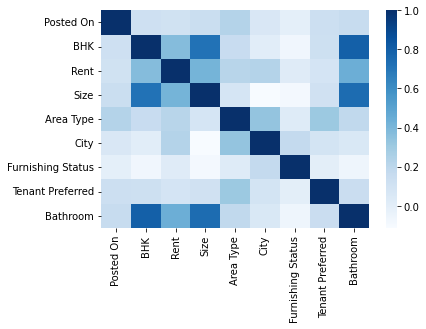

In [14]:
# finding out co-orelation 

house_data_corr = house_data.corr()
sns.heatmap(house_data_corr, cmap = "Blues")

## Splitting Features and Labels

In [15]:
#dividing data

x = house_data.drop(columns = 'Rent',axis = 1)

y = house_data['Rent']

## Splitting Train and Test data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [17]:
# model

model = XGBRegressor()

In [18]:
print (x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3796, 8) (3796,) (950, 8) (950,)


## Training model

In [19]:
#training model

model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [20]:
#Prediction on training data
train_data_prediction = model.predict(x_train)

In [21]:
#Using metrics module , we are check r2score , mean absolute error

train_r2_score = metrics.r2_score(y_train, train_data_prediction)

train_mean_error = metrics.mean_absolute_error(y_train, train_data_prediction)

print(train_r2_score , train_mean_error)

0.9842194260495155 4577.581313749259


In [22]:
#Fitting Test data into model
model.fit(x_test, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
#Prediction on Test data
test_data_prediction = model.predict(x_test)

In [24]:
#Using metrics module , we are check r2score , mean absolute error

test_r2_score = metrics.r2_score(y_test, test_data_prediction)

test_mean_error = metrics.mean_absolute_error(y_test, test_data_prediction)

print(test_r2_score , test_mean_error)

0.9995884585936734 1713.9607400030839


In [25]:
house_data.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,738293,2,10000,1100,0,4,1,0,2
1,738288,2,20000,800,0,4,0,0,1
2,738291,2,17000,1000,0,4,0,0,1
3,738340,2,10000,800,0,4,1,0,1
4,738284,2,7500,850,1,4,1,1,1


## Building Prediction System

In [39]:
input_data = model.predict(np.array([[738288, 2, 800, 0, 4, 0, 0, 1]])) 
print("predicted price is",input_data)

predicted price is [8806.241]
